In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from gensim import models, corpora
from nltk.stem import PorterStemmer
from textblob import TextBlob
from collections import Counter
import os
import warnings
import re

In [2]:
df = pd.read_csv('/Users/chameleonjj/Downloads/UCB FINAL/Data/Original Data/0819_UkraineCombinedTweetsDeduped.csv', index_col=0)

In [3]:
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769
1,335041409,XclusivasPuebla,Somos el periódico #ExclusivasPuebla| Investi...,"Puebla, México",1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:51:50.523048
2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216
3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532
4,20297125,ElMananaOnline,Las mejores noticias de los dos Laredos y el m...,Nuevo Laredo,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:52:29.448634


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47994 entries, 0 to 47993
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   47994 non-null  int64  
 1   username                 47994 non-null  object 
 2   acctdesc                 43037 non-null  object 
 3   location                 31703 non-null  object 
 4   following                47994 non-null  int64  
 5   followers                47994 non-null  int64  
 6   totaltweets              47994 non-null  int64  
 7   usercreatedts            47994 non-null  object 
 8   tweetid                  47994 non-null  int64  
 9   tweetcreatedts           47994 non-null  object 
 10  retweetcount             47994 non-null  int64  
 11  text                     47994 non-null  object 
 12  hashtags                 47994 non-null  object 
 13  language                 47994 non-null  object 
 14  coordinates           

In [5]:
# Understanding my data:
# userid: The unique identifier of the user who posted the tweet.
# username: The username of the user who posted the tweet.
# acctdesc: The description provided in the user's Twitter profile.
# location: The location provided in the user's Twitter profile.
# following: The number of accounts the user is following.
# followers: The number of accounts that follow the user.
# totaltweets: The total number of tweets posted by the user.
# usercreatedts: The timestamp of when the user's Twitter account was created.
# tweetid: The unique identifier of the tweet.
# tweetcreatedts: The timestamp of when the tweet was created.
# retweetcount: The number of times the tweet has been retweeted.
# text: The text of the tweet.
# hashtags: Any hashtags included in the tweet.
# language: The language of the tweet.
# coordinates: The geographic coordinates of the tweet.
# favorite_count: The number of times the tweet has been favorited.
# is_retweet: A Boolean value indicating whether the tweet is a retweet.
# original_tweet_id: The unique identifier of the original tweet, if the current tweet is a retweet.
# original_tweet_userid: The unique identifier of the user who posted the original tweet, if the current tweet is a retweet.
# original_tweet_username: The username of the user who posted the original tweet, if the current tweet is a retweet.
# in_reply_to_status_id: The unique identifier of the tweet to which this tweet is a reply, if any.
# in_reply_to_user_id: The unique identifier of the user to whom this tweet is a reply, if any.
# in_reply_to_screen_name: The username of the user to whom this tweet is a reply, if any.
# is_quote_status: A Boolean value indicating whether the tweet is a quote tweet.
# quoted_status_id: The unique identifier of the original tweet being quoted, if the current tweet is a quote tweet.
# quoted_status_userid: The unique identifier of the user who posted the original tweet being quoted, if the current tweet is a quote tweet.
# quoted_status_username: The username of the user who posted the original tweet being quoted, if the current tweet is a quote tweet.
# extractedts: The timestamp when the tweet was extracted or collected from Twitter.


In [6]:
##############################################
##############################################
# PREDICTING SENTIMENT OF TWEETS
##############################################
##############################################

In [7]:
# To make my sentiment analysis more interesting I decided to:

# * compare sentiment across users based on their geographical location. Hopefully I will identify differences 
#   in sentiment and understand how different groups of people are reacting to the topic.

# * identify key topics and keywords that are driving sentiment. Hopefully I will understand the factors that 
#.  are driving sentiment.

# * visualize sentiment over time to see how sentiment is changing over time. Hopefully I will identify 
#.  trends and understand how sentiment is evolving.

In [8]:
# Finding out included languages
print(df['language'].unique())

['en' 'es' 'ht' 'ja' 'nl' 'und' 'ca' 'zh' 'pt' 'it' 'fr' 'no' 'pl' 'vi'
 'ka' 'de' 'tl' 'fi' 'ru' 'kn' 'tr' 'el' 'uk' 'in' 'ko' 'iw' 'ur' 'et'
 'lv' 'ar' 'da' 'ta' 'eu' 'fa' 'ro' 'hi' 'th' 'sv' 'my' 'sr' 'is' 'lt'
 'gu' 'am' 'bg' 'te' 'bn' 'sl' 'or' 'cs' 'ne' 'mr' 'ml' 'cy' 'hy' 'hu'
 'pa' 'sd' 'ps']


In [9]:
# Finding out how many English tweets are in a dataset
print(df['language'].value_counts()['en'])

23179


In [10]:
# Keeping only English tweets because the dataset with over 20000 entries is still a good size and some of the
# tools work only with English.
df = df[df['language'] == 'en']

# I no longer need 'language' column
df.drop('language', axis=1, inplace=True)

In [11]:
# Making a copy of the data to later use it to compare the new data changes
df_original = df.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   23179 non-null  int64  
 1   username                 23179 non-null  object 
 2   acctdesc                 21152 non-null  object 
 3   location                 15696 non-null  object 
 4   following                23179 non-null  int64  
 5   followers                23179 non-null  int64  
 6   totaltweets              23179 non-null  int64  
 7   usercreatedts            23179 non-null  object 
 8   tweetid                  23179 non-null  int64  
 9   tweetcreatedts           23179 non-null  object 
 10  retweetcount             23179 non-null  int64  
 11  text                     23179 non-null  object 
 12  hashtags                 23179 non-null  object 
 13  coordinates              4 non-null      object 
 14  favorite_count        

In [13]:
##############################################
# Text cleaning

In [14]:
# 1. Removing unwanted characters such as special characters, punctuation, and digits from the text data using 
# regular expressions.
#import re

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [15]:
# 2. Converting all the text data to lowercase using the lower() function.
df['text'] = df['text'].apply(lambda x: x.lower())

In [16]:
# 3. Removing stop words from the text data using NLTK.
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [17]:
# 4. Removing extra whitespaces from the text data using the strip() function.
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

In [18]:
# 5. Tokenizing each word in the text data into individual tokens.
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [19]:
# 6. Normalization: Performing lemmatization first, because it produces a more accurate base form of the word 
#.   compared to stemming, as it considers the part of speech and the context of the word in the sentence.

In [22]:
# Performing lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [23]:
# Stemming: 
stemmer = PorterStemmer()
df['stemmed'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [24]:
##############################################
# Checking if everything worked correctly by comparing the original text data with the cleaned text data.

In [25]:
# 1. Checking the length of the text data before and after cleaning
print("Original Text Length:", len(df_original['text'][0]))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['text'] = df['text'].apply(lambda x: x.lower())
print("Cleaned Text Length:", len(df['text'][0]))

Original Text Length: 304
Cleaned Text Length: 245


In [26]:
# 2. Checking the first few lines of the original text data and the cleaned text data:
print("Original Text:\n", df_original['text'][0])
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['text'] = df['text'].apply(lambda x: x.lower())
print("Cleaned Text:\n", df['text'][0])

Original Text:
 Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu
Cleaned Text:
 dear vaccine advocate take covid mrna shot boosters know ourworldindata data shows offers zero protection actually accelerates death vaccinated regards pfizer astrazeneca moderna nwo agenda cop biden obama trudeau jacinda life httpstcovtbfuqidvu


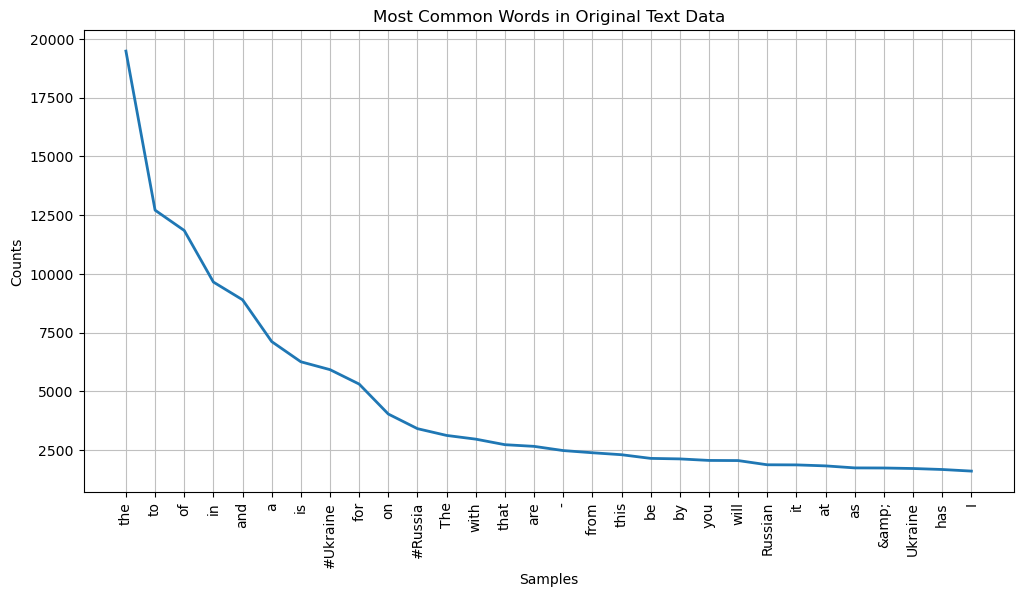

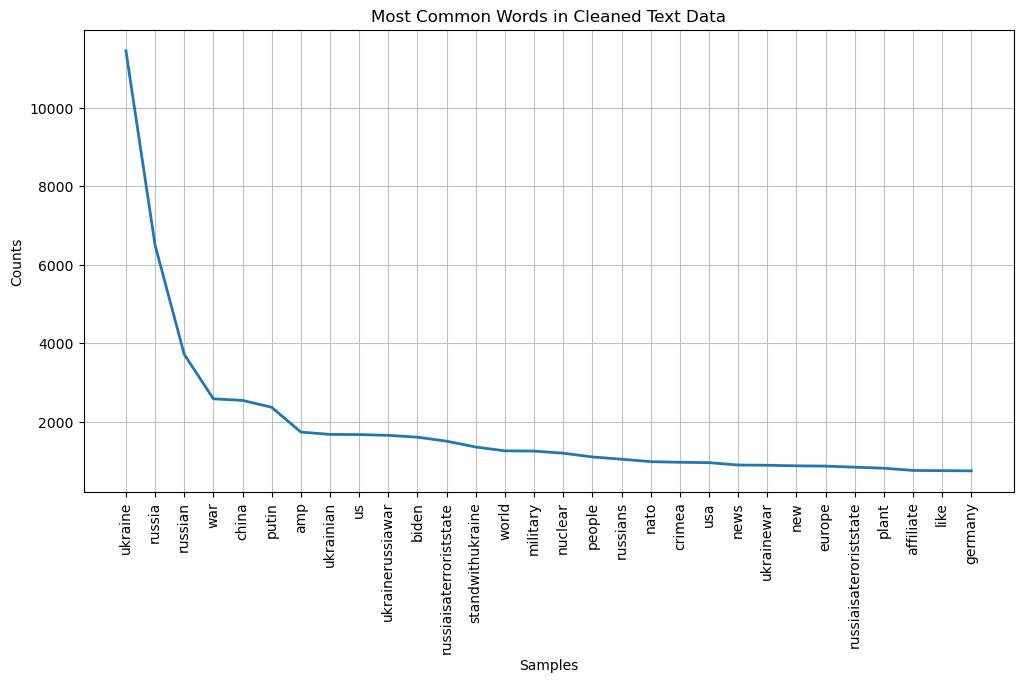

In [27]:
# 3. Comparing the frequency and type of most used words of the original text data and the cleaned text data:
#from nltk.probability import FreqDist
#import matplotlib.pyplot as plt

original_words = []
cleaned_words = []

for text in df_original['text']:
    for word in text.split():
        original_words.append(word)

for text in df['text']:
    for word in text.split():
        cleaned_words.append(re.sub(r'[^a-zA-Z\s]', '', word).lower())

original_word_freq = FreqDist(original_words)
cleaned_word_freq = FreqDist(cleaned_words)

plt.figure(figsize=(12, 6))
original_word_freq.plot(30, title='Most Common Words in Original Text Data')
plt.show()

plt.figure(figsize=(12, 6))
cleaned_word_freq.plot(30, title='Most Common Words in Cleaned Text Data')
plt.show()

In [1]:
# We can see on  the above charts that more meaningful to our subject words are most common in the revised text.

In [28]:
##############################################
# Sentiment Analysis

In [29]:
# Using a pre-trained sentiment analysis model TextBlob to analyze the sentiment of each tweet and 
# assigning a positive or negative label.
# Defining a function to calculate the sentiment polarity of each tweet
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying the get_sentiment function to the 'text' column of the dataframe
df['sentiment'] = df['text'].apply(get_sentiment)

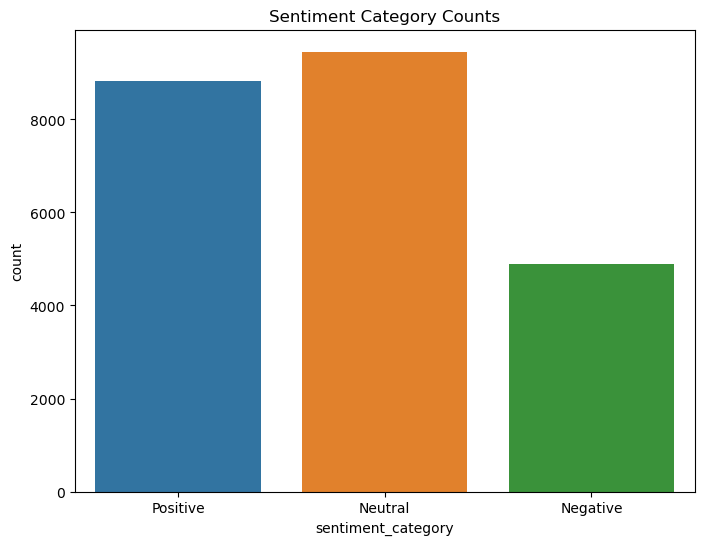

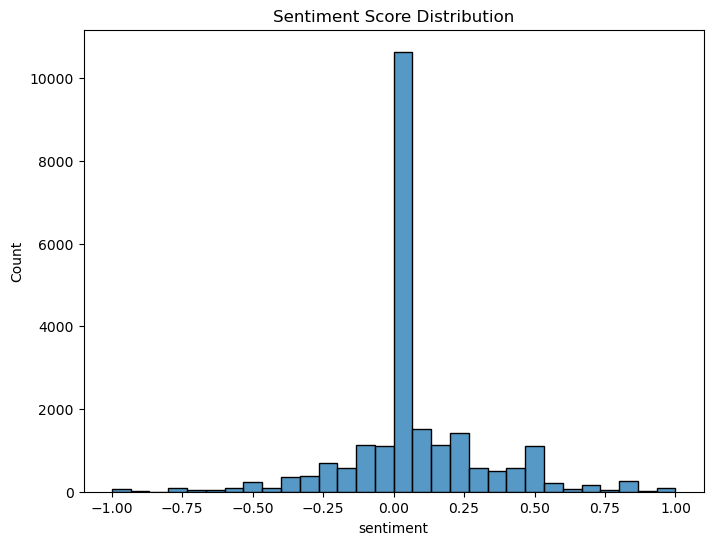

In [30]:
# Defining a function to assign sentiment categories
def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Applying the get_sentiment_category function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)

# Bar Plot
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Category Counts')
plt.show()

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(df['sentiment'], kde=False, bins=30)
plt.title('Sentiment Score Distribution')
plt.show()


In [ ]:
# The sentiment category chart shows that neutral is the most prominent category, closely followed by positive.
# The negative categoty is only about half the size of neutral category.
# The sentiment score distribution shows that most prominent is score 0 for neutral and the highest frequency 
# for both positive and negative trails mostly very close to 0.

In [31]:
# Defining a function to assign sentiment categories
def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Applying the get_sentiment_category function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)

# Getting the count of each category
category_counts = df['sentiment_category'].value_counts()
print("Category Counts:")
print(category_counts)

# Getting the percentage of each category
category_percentage = df['sentiment_category'].value_counts(normalize=True) * 100
print("\nCategory Percentage:")
print(category_percentage)


Category Counts:
Neutral     9458
Positive    8832
Negative    4889
Name: sentiment_category, dtype: int64

Category Percentage:
Neutral     40.804176
Positive    38.103456
Negative    21.092368
Name: sentiment_category, dtype: float64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   23179 non-null  int64  
 1   username                 23179 non-null  object 
 2   acctdesc                 21152 non-null  object 
 3   location                 15696 non-null  object 
 4   following                23179 non-null  int64  
 5   followers                23179 non-null  int64  
 6   totaltweets              23179 non-null  int64  
 7   usercreatedts            23179 non-null  object 
 8   tweetid                  23179 non-null  int64  
 9   tweetcreatedts           23179 non-null  object 
 10  retweetcount             23179 non-null  int64  
 11  text                     23179 non-null  object 
 12  hashtags                 23179 non-null  object 
 13  coordinates              4 non-null      object 
 14  favorite_count        

In [33]:
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,tokens,lemmatized,stemmed,sentiment,sentiment_category
0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,...,False,0,0,NaN,2022-08-19 08:07:26.836769,"[dear, vaccine, advocate, take, covid, mrna, s...",dear vaccine advocate take covid mrna shot boo...,dear vaccin advoc take covid mrna shot booster...,0.050,Positive
2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,...,False,0,0,NaN,2022-08-19 05:12:06.194216,"[animal, shelter, dogs, cats, need, help, rais...",animal shelter dog cat need help raising fund ...,anim shelter dog cat need help rais fund food ...,0.375,Positive
3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,...,False,0,0,NaN,2022-08-19 11:22:26.824532,"[welcome, shelter, located, ukraine, kyiv, she...",welcome shelter located ukraine kyiv shelter n...,welcom shelter locat ukrain kyiv shelter need ...,0.800,Positive
5,1453260685530603528,GermanyInSEAsia,A public diplomacy initiative of 🇩🇪's Federal ...,NaN,129,2509,522,2021-10-27 07:22:46.000000,1560416258461298689,2022-08-19 00:00:01,...,True,1559920015482175488,27830610,WFP,2022-08-19 05:12:06.096707,"[good, news, may, missed, first, wfp, shipment...",good news may missed first wfp shipment wheat ...,good news may miss first wfp shipment wheat hu...,0.075,Positive
6,15968273,Foxmental_X,1/2 my posts will bore you. The other 1/2 will...,NYC,6013,6546,308820,2008-08-24 12:06:19.000000,1560416263557505024,2022-08-19 00:00:03,...,False,0,0,NaN,2022-08-19 08:02:53.510769,"[opinion, ukraine, war, also, fought, language...",opinion ukraine war also fought language cnn u...,opinion ukrain war also fought languag cnn ukr...,0.000,Neutral


In [ ]:
##############################################
##############################################
# Creating ML MODEL
##############################################
##############################################

In [34]:
##############################################
# Splitting the data

In [35]:
X = df.drop('sentiment', axis = 1)
y = df['sentiment']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, random_state = 42)

In [37]:
X_train.head()

24256    twitter osint community reliability weeks ahea...
37937    hire awesome ukraine developer create autopilo...
2513     spend extra bil dust putin go around dont deal...
44331    markito geolocation former ammunition store al...
30475    zelensky worst leader ukraine sole reason live...
Name: text, dtype: object

In [38]:
##############################################
# COUNT VECTORIZATION

In [39]:
# Using the CountVectorizer
cvect = CountVectorizer()
dtm = cvect.fit_transform(X_train)
pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,aa,aaa,aaaaaaaand,aadlandforco,aah,aalimov,aamir,aamirkhan,aamp,aana,...,zurichlake,zuxker,zuzanacaputova,zvehicles,zvezda,zvo,zwald,zzeldazdenka,zzp,zzzaikar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# To ensure that the GridSearchCV object will interpret the target variable as a classification problem and not 
# as a regression problem, I will convert the continuous sentiment scores into discrete classes (positive, negative,
# neutral), before passing them to the fit() method. 
# Converting the sentiment scores based on a threshold value
def get_sentiment_class(score, threshold=0.0):
    if score > threshold:
        return 'positive'
    elif score < -threshold:
        return 'negative'
    else:
        return 'neutral'

# Applying this function to the y_train variable to convert the sentiment scores into classes
y_train_class = y_train.apply(lambda x: get_sentiment_class(x, threshold=0.2))

In [41]:
# Defining pipeline and parameter grid for LogisticRegression
lr_pipe = Pipeline([('cvect', CountVectorizer()), ('lgr', LogisticRegression())])
lr_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__C': [0.1, 1, 10]
}

# Defining pipeline and parameter grid for DecisionTreeClassifier
dt_pipe = Pipeline([('cvect', CountVectorizer()), ('dtc', DecisionTreeClassifier())])
dt_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10]
}

# Defining pipeline and parameter grid for MultinomialNB
nb_pipe = Pipeline([('cvect', CountVectorizer()), ('mnb', MultinomialNB())])
nb_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'mnb__alpha': [0.1, 1, 10]
}

# Fitting the data and find best parameters for LogisticRegression
grid_lr = GridSearchCV(lr_pipe, lr_params, cv=5, n_jobs=-1, refit=True)
grid_lr.fit(X_train, y_train_class)
print("Best parameters for Logistic Regression: ", grid_lr.best_params_)
print("Best score for Logistic Regression: ", grid_lr.best_score_)
print("Fitting time for Logistic Regression: ", grid_lr.refit_time_)

# Fitting the data and find best parameters for DecisionTreeClassifier
grid_dt = GridSearchCV(dt_pipe, dt_params, cv=5, n_jobs=-1, refit=True)
grid_dt.fit(X_train, y_train_class)
print("Best parameters for Decision Tree Classifier: ", grid_dt.best_params_)
print("Best score for Decision Tree Classifier: ", grid_dt.best_score_)
print("Fitting time for Decision Tree Classifier: ", grid_dt.refit_time_)

# Fitting the data and find best parameters for MultinomialNB
grid_nb = GridSearchCV(nb_pipe, nb_params, cv=5, n_jobs=-1, refit=True)
grid_nb.fit(X_train, y_train_class)
print("Best parameters for MultinomialNB: ", grid_nb.best_params_)
print("Best score for MultinomialNB: ", grid_nb.best_score_)
print("Fitting time for MultinomialNB: ", grid_nb.refit_time_)

# Creating a list of dictionaries containing the results for each model
results = [
    {'Model': 'Logistic Regression', 'Best Parameters': grid_lr.best_params_, 'Best Score': grid_lr.best_score_, 'Time to Fit Data': grid_lr.refit_time_},
    {'Model': 'Decision Tree', 'Best Parameters': grid_dt.best_params_, 'Best Score': grid_dt.best_score_, 'Time to Fit Data': grid_dt.refit_time_},
    {'Model': 'MultinomialNB', 'Best Parameters': grid_nb.best_params_, 'Best Score': grid_nb.best_score_, 'Time to Fit Data': grid_nb.refit_time_}
]

# Creating a DataFrame from the list of dictionaries and save it as a spreadsheet
results_df = pd.DataFrame(results)

# Seting the display options
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) # Show full width of each column

# Loading and display the dataframe
results_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'lgr__C': 1, 'lgr__penalty': 'l2'}
Best score for Logistic Regression:  0.8521054187091037
Fitting time for Logistic Regression:  0.4881899356842041
Best parameters for Decision Tree Classifier:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'dtc__criterion': 'gini', 'dtc__max_depth': None}
Best score for Decision Tree Classifier:  0.8284054710338825
Fitting time for Decision Tree Classifier:  1.379136085510254
Best parameters for MultinomialNB:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'mnb__alpha': 10}
Best score for MultinomialNB:  0.792395200682572
Fitting time for MultinomialNB:  0.23773694038391113


,Model,Best Parameters,Best Score,Time to Fit Data
0,Logistic Regression,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'lgr__C': 1, 'lgr__penalty': 'l2'}",0.852105,0.488190
1,Decision Tree,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'dtc__criterion': 'gini', 'dtc__max_depth': None}",0.828405,1.379136
2,MultinomialNB,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'mnb__alpha': 10}",0.792395,0.237737


In [42]:
##############################################
# TF-IDF

In [43]:
# Defining pipeline and parameter grid for LogisticRegression
lr_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('lgr', LogisticRegression())])
lr_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__C': [0.1, 1, 10]
}

# Defining pipeline and parameter grid for DecisionTreeClassifier
dt_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('dtc', DecisionTreeClassifier())])
dt_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10]
}

# Defining pipeline and parameter grid for MultinomialNB
nb_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])
nb_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'mnb__alpha': [0.1, 1, 10]
}

# Fitting the data and find best parameters for LogisticRegression
grid_lr = GridSearchCV(lr_pipe, lr_params, cv=5, n_jobs=-1, refit=True)
grid_lr.fit(X_train, y_train_class)
print("Best parameters for Logistic Regression: ", grid_lr.best_params_)
print("Best score for Logistic Regression: ", grid_lr.best_score_)
print("Fitting time for Logistic Regression: ", grid_lr.refit_time_)

# Fitting the data and find best parameters for DecisionTreeClassifier
grid_dt = GridSearchCV(dt_pipe, dt_params, cv=5, n_jobs=-1, refit=True)
grid_dt.fit(X_train, y_train_class)
print("Best parameters for Decision Tree Classifier: ", grid_dt.best_params_)
print("Best score for Decision Tree Classifier: ", grid_dt.best_score_)
print("Fitting time for Decision Tree Classifier: ", grid_dt.refit_time_)

# Fitting the data and find best parameters for MultinomialNB
grid_nb = GridSearchCV(nb_pipe, nb_params, cv=5, n_jobs=-1, refit=True)
grid_nb.fit(X_train, y_train_class)
print("Best parameters for MultinomialNB: ", grid_nb.best_params_)
print("Best score for MultinomialNB: ", grid_nb.best_score_)
print("Fitting time for MultinomialNB: ", grid_nb.refit_time_)

# Creating a list of dictionaries containing the results for each model
results = [
    {'Model': 'Logistic Regression', 'Best Parameters': grid_lr.best_params_, 'Best Score': grid_lr.best_score_, 'Time to Fit Data': grid_lr.refit_time_},
    {'Model': 'Decision Tree', 'Best Parameters': grid_dt.best_params_, 'Best Score': grid_dt.best_score_, 'Time to Fit Data': grid_dt.refit_time_},
    {'Model': 'MultinomialNB', 'Best Parameters': grid_nb.best_params_, 'Best Score': grid_nb.best_score_, 'Time to Fit Data': grid_nb.refit_time_}
]

# Creating a DataFrame from the list of dictionaries and save it as a spreadsheet
results_df = pd.DataFrame(results)

# Seting the display options
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) # Show full width of each column

# Loading and displaying the dataframe
results_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for Logistic Regression:  {'lgr__C': 10, 'lgr__penalty': 'l2', 'tfidf__max_features': 2000, 'tfidf__stop_words': None}
Best score for Logistic Regression:  0.8544636743247505
Fitting time for Logistic Regression:  0.5102958679199219
Best parameters for Decision Tree Classifier:  {'dtc__criterion': 'gini', 'dtc__max_depth': None, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}
Best score for Decision Tree Classifier:  0.819776549033547
Fitting time for Decision Tree Classifier:  3.763279914855957
Best parameters for MultinomialNB:  {'mnb__alpha': 0.1, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}
Best score for MultinomialNB:  0.8013113959794314
Fitting time for MultinomialNB:  0.2452831268310547


,Model,Best Parameters,Best Score,Time to Fit Data
0,Logistic Regression,"{'lgr__C': 10, 'lgr__penalty': 'l2', 'tfidf__max_features': 2000, 'tfidf__stop_words': None}",0.854464,0.510296
1,Decision Tree,"{'dtc__criterion': 'gini', 'dtc__max_depth': None, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}",0.819777,3.763280
2,MultinomialNB,"{'mnb__alpha': 0.1, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}",0.801311,0.245283


In [44]:
##############################################
##############################################
# BEST ML MODEL
# The best model turned out to be a Logistic Regression model run through TF-IDF with a score of 0.852105, 
# which indicates that with the best parameters, the model correctly predicted the sentiment of about 85.4% 
#of the tweets in the validation set. The best parameters are:
# *)'gr__C (the inverse of regularization strength): 10.  It suggests a relatively weaker regularization, 
#.   allowing the model to fit the training data more closely.
# *)'lgr__penalty': 'l2'. L2 regularization discourages large coefficients by adding a penalty equal to 
#.   the square of the magnitude of coefficients to the loss function.
# *)'tfidf__max_features': 2000: This parameter is used in the TF-IDF Vectorizer, it sets a limit to the 
#.   top 2000 features ordered by term frequency across the corpus.
# *)'tfidf__stop_words': None: This means that the TF-IDF Vectorizer is not removing any stop words from the text. 
# Logistic regression with TF-IDF had a second time when it comes to training.
##############################################
##############################################

In [45]:
##############################################
# Comparing sentiment across users based on their geographical location. Hopefully I will identify differences 
# in sentiment and understand how different groups of people are reacting to the topic.

In [46]:
# Filtering out the rows where the location is null as they won't be useful for our analysis.

# Checking for missing values in the entire dataframe
print(df.isnull().values.any())

# Checking for missing values in each column
print(df.isnull().sum())

True
userid                         0
username                       0
acctdesc                    2027
location                    7483
following                      0
followers                      0
totaltweets                    0
usercreatedts                  0
tweetid                        0
tweetcreatedts                 0
retweetcount                   0
text                           0
hashtags                       0
coordinates                23175
favorite_count                 0
is_retweet                     0
original_tweet_id              0
original_tweet_userid          0
original_tweet_username    23179
in_reply_to_status_id          0
in_reply_to_user_id            0
in_reply_to_screen_name    17354
is_quote_status                0
quoted_status_id               0
quoted_status_userid           0
quoted_status_username     19894
extractedts                    0
tokens                         0
lemmatized                     0
stemmed                        0
senti

In [47]:
# Droping rows with missing values in the 'location' column
df = df.dropna(subset=['location'])

# Counting the number of missing values in the 'location' column
print(df['location'].isnull().sum())

0


In [48]:
# The goal is to get at least 5,000 records for some countries that will tell us a story

In [49]:
# Geting the number of unique values in the 'location' column
num_locations = df['location'].nunique()

# Printing the number of unique values
print("The 'location' column has", num_locations, "unique values.")

The 'location' column has 3987 unique values.


In [50]:
# Exploring what are the most frequent words

# Concatenating all values in the 'location' column to a single string
text = ' '.join(df['location'].astype(str))

# Useing the Counter class to count the frequency of each word in the string
word_counts = Counter(text.split())

# Useing the most_common method of the Counter class to get a list of the most common words and their frequencies
most_common_words = word_counts.most_common()
print(most_common_words)


[('Ukraine', 1141), ('USA', 936), ('United', 603), ('New', 455), ('India', 448), ('England', 369), ('States', 363), ('Україна', 328), ('Earth', 327), ('CA', 292), ('the', 278), ('in', 262), ('London', 255), ('London,', 251), ('The', 248), ('of', 232), ('UK', 230), ('Kingdom', 230), ('🇺🇸', 208), ('DC', 200), ('Canada', 196), ('North', 193), ('Planet', 193), ('Colorado,', 189), ('Washington,', 183), ('Украина', 177), ('NY', 169), ('TX', 165), ('Germany', 164), ('Kyiv,', 162), ('York,', 154), ('South', 149), ('France', 149), ('San', 147), ('IN', 145), ('Kyiv', 141), ('FL', 133), ('Florida', 132), ('🌎-I', 129), ('FOLLOW', 129), ('24', 129), ('⌛️hrs', 129), ('/LESS', 129), ('World', 123), ('Global', 123), ('Belgium', 121), ('China', 114), ('-', 112), ('Austin,', 108), ('Europe', 105), ('Internet', 98), ('Africa', 98), ('York', 97), ('USA,', 93), ('&', 92), ('Netherlands', 91), ('California', 85), ('Lost', 81), ('Washington', 80), ('Weston,', 80), ('and', 79), ('Cape', 78), ('Las', 78), ('Au

In [51]:
# 3987 unique values is a lot and it wouldn't make sense to post it in the current state. 
# Grouping the locations by country.

In [52]:
# Creating a boolean mask for matching values
mask = df['location'].str.contains('United States|USA|🇺🇸|usa|Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming|AL|AK|AZ|AR|CO|CT|DE|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|San Francisco|Los Angeles|🇺🇸|Humboldt|Coral', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'USA'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Україна|Ukraine|🇷🇼|🇺🇦|Kyiv|Kiev|Kharkiv|Харьков|Украина|Київ|Lviv', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Ukraine'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('England|🇬🇧|London|UK|United Kingdom|Scotland|Wales|London|Birmingham|Liverpool|Nottingham|Sheffield|Bristol|Glasgow|LeicesterEdinburgh', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'England'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('India|🇮🇳|Delhi|Mumbai|Bangalore|Bengaluru|Hyderabad|Kochi', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'India'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Earth|Internet|Global|World|Europe|A point in the infinite cosmos|Everywhere|FOLLOW|church|STAR|Intestine.|reflect|t@betterbanned.com|52|EU|2006|p/t|Forbidden|Somewhere|Neverland|Africa|worldwide|23|xxx|Manna-hata|Fighting|Bath|world|Rosh|10|h̤͓̺̲͢͡è̷̶͔͔̲̪̯ľ̺͚̬̞͓̇̃͗͏̡̀l|Home', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Misc.'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Germany|Deutschland|Berlin|Munich|Bonn|Frankfurt', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Germany'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('France|🇧🇪|Paris|Marseille|Lyon|Toulouse|Nice|Nantes|Montpellier|Strasbourg|Bordeaux|Lille', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'France'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Netherlands|NL|Nederland', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Netherlands'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('China|Beijing|Shanghai|Singapore|Hong Kong', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'China'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('South Africa|RPA', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'South Africa'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Sweden|Sverige|Stockholm|Goteborg', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Sweden'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Russia|Россия|Moscow', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Russia'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Switzerland|Suisse|Zürich|Geneva|Basel|Lausanne|Bern|Winterthur|Lucerne|Gallen', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Switzerland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Belgium|Brussels|België|Belgique', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Belgium'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Canada|Toronto|Ottawa|Alberta|🇨🇦', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Canada'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Nigeria|Port Harcourt', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Nigeria'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Australia|Melbourne', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Australia'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Ireland|Dublin|Belfast|Cork|Galway|Craigavon|Waterford|Drogheda', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Ireland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Italia|Italy|Rome|Milan|Venice|Porto San Giorgio|Udine', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Italy'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Kenya', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Kenya'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Pakistan|Karachi', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Pakistan'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Greece', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Greece'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Romania|România', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Romania'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Iceland|IS', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Iceland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Japan|Tokyo|Kyoto|Saitama|Hiroshima|Sendai|Chiba', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Japan'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Romania', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Romania'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Spain|Madrid|Barcelona|España|🇪🇦🇪🇦🇪🇦', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Spain'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Finland|Helsinki', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Finland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Poland|🇵🇱|Polska|Warsaw|Zagan|Gdansk|Szczecin|Cracow|Krakow|Wroclaw|Poznan', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Poland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('UAE|𝑼𝑨𝑬|UA|United Arab Emirates|Dubai|Abu Dhabi|Sharjah|Al Ain', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'UAE'


In [53]:
# Geting the value counts of each location 
location_counts = df['location'].value_counts()  

# Geting the top 50 locations and their counts 
top_50_locations = location_counts.head(50)  
# Print the top 50 locations and their counts 
print(top_50_locations)   

# Geting the number of unique values in the 'location' column 
num_locations = df['location'].nunique()  
# Print the number of unique values 
print("The 'location' column has", num_locations, "unique values.")


USA                       4157
Ukraine                   2033
Misc.                     1644
England                   1189
India                      506
Germany                    295
China                      292
Canada                     269
Belgium                    202
France                     191
Netherlands                148
Russia                     120
Italy                      111
Australia                  111
Sweden                     110
Pakistan                   107
Switzerland                103
Ireland                    102
Nigeria                    101
Japan                       80
UAE                         62
Poland                      60
Spain                       58
Romania                     55
Finland                     55
Iceland                     47
Kenya                       47
Greece                      36
♥ ɐlǝnzǝuǝΛ ♋               28
Boston                      27
Sri Lanka                   25
Norway                      24
US      

In [54]:
# Grouping by location and calculating mean sentiment score
location_sentiment = df.groupby('location')['sentiment'].mean().reset_index()

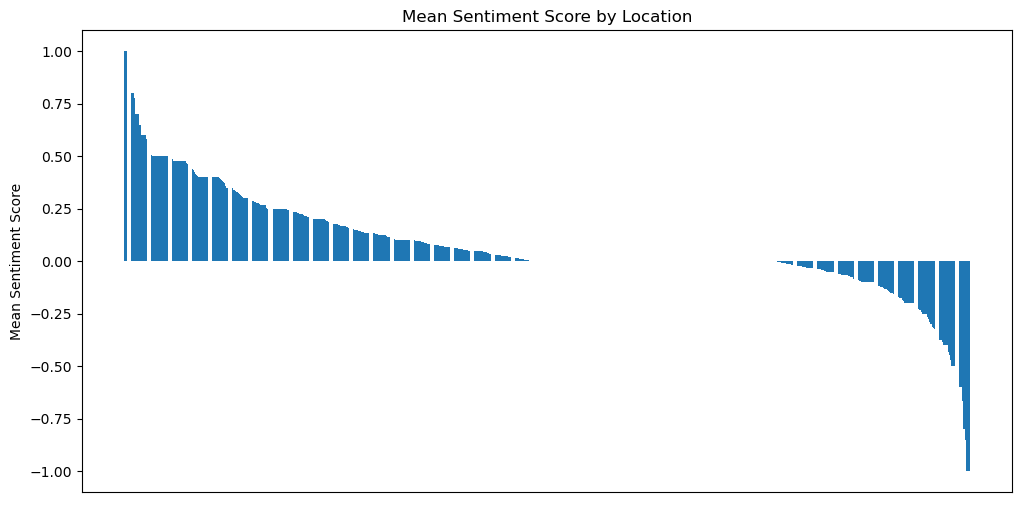

In [55]:
# Sorting locations by mean sentiment score in descending order
location_sentiment = location_sentiment.sort_values('sentiment', ascending=False)

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating a bar plot of mean sentiment score by location
plt.bar(location_sentiment['location'], location_sentiment['sentiment'])

# Setting the title and axis labels
plt.title('Mean Sentiment Score by Location')
plt.ylabel('Mean Sentiment Score')

# Removing the x-axis ticks and labels
plt.xticks([], [])

# Showing the plot
plt.show()


In [56]:
# In the chart above since there were over 3000 values I decided not to list them. This chart's goal is to give us
# a general idea of the sentiment in the world from English speaking population. We clearly can see 
# that majority (about half) of the world has positive sentiment. A little bit more than 25% of the world is neutral
# and slightly less than 25% has a negative sentiment.

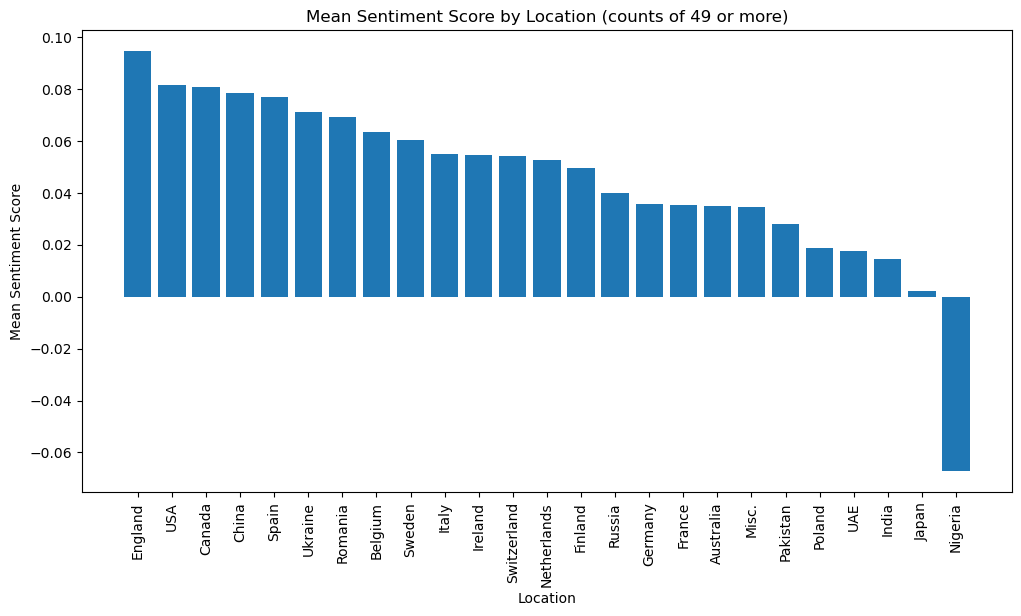

In [57]:
# Now we will try to explore the data by country for countries that we were able to get at least 49 data points
# Geting the value counts of each location 
location_counts = df['location'].value_counts() 

# Filtering locations with counts of 49 or more
filtered_locations = location_counts[location_counts >= 49].index

# Creating a new DataFrame with only the filtered locations
location_sentiment = df[df['location'].isin(filtered_locations)].groupby('location')['sentiment'].mean().reset_index()

# Sorting locations by mean sentiment score in descending order
location_sentiment = location_sentiment.sort_values('sentiment', ascending=False)

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating a bar plot of mean sentiment score by location
plt.bar(location_sentiment['location'], location_sentiment['sentiment'])

# Setting the title and axis labels
plt.title('Mean Sentiment Score by Location (counts of 49 or more)')
plt.xlabel('Location')
plt.ylabel('Mean Sentiment Score')

# Rotating the x labels by 90 degrees
plt.xticks(rotation=90)

# Showing the plot
plt.show()


In [58]:
# The above plot shows countries' sentiment as well but only for the countries that had 49+ combined frequency. 
# The most positive sentiment shows Englad that is followed by USA, Canada and China. It is very interseting
# that the positive sentiment is not very strong and is captured below 0.09 where the maximum scale is 1.0
# The most neutral appears Japan that is almost at 0.
# The most negative is Nigeria, but even then their sentiment is around -0.06 where the maximum scale is -1.

In [59]:
##############################################
# I will identify key topics and keywords that are driving sentiment. Hopefully I will understand the factors that 
# are driving sentiment.

In [60]:
# Creating a list of tweets
tweets = df['text'].tolist()

# Tokenizing the tweets
tokenized_tweets = [tweet.split() for tweet in tweets]

# Creating a dictionary from the tokenized tweets
dictionary = corpora.Dictionary(tokenized_tweets)

# Creating a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_tweets]

# Creating an LDA model
lda_model = models.LdaModel(doc_term_matrix, num_topics=1, id2word=dictionary, passes=10)

# Geting the topics and their corresponding keywords
topics = lda_model.print_topics(num_words=5)

# Printing the topics and their keywords
for topic in topics:
    print(topic)


(0, '0.024*"ukraine" + 0.013*"russia" + 0.008*"russian" + 0.005*"war" + 0.005*"putin"')


In [61]:
# We just confirmed that the main topic for th tweets is the Ukraine Russia war.

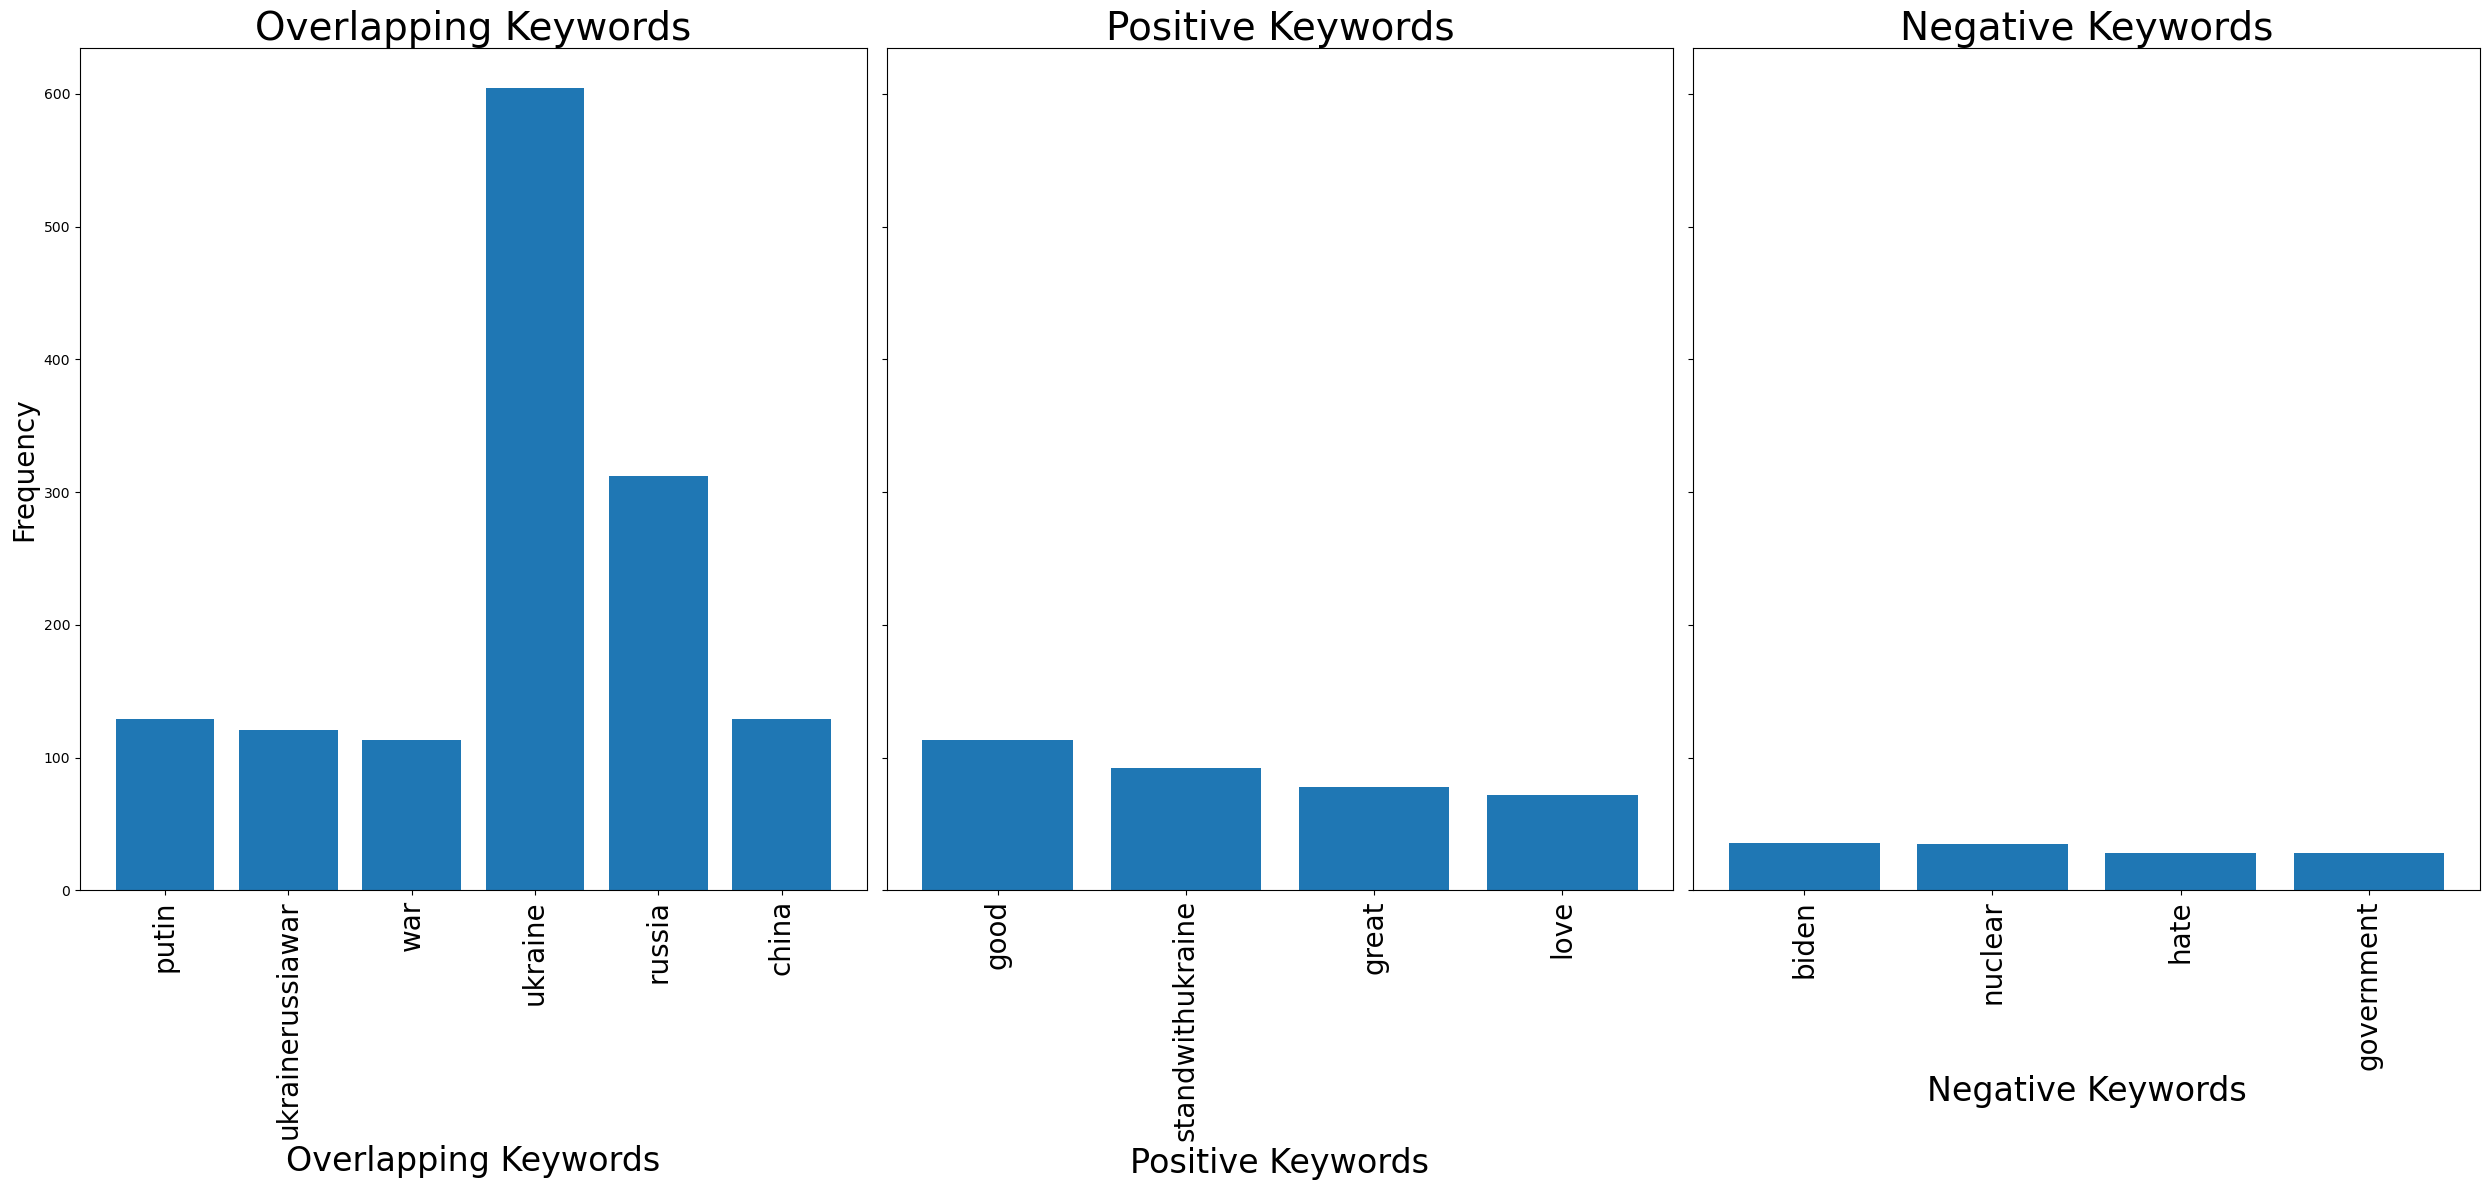

In [62]:
# Checking if 'sentiment' column exists in the DataFrame
if 'sentiment' not in df.columns:
    print("Error: 'sentiment' column does not exist in the DataFrame.")
    exit()

# Filtering tweets with sentiment >= 0.5
positive_tweets = df[df['sentiment'] >= 0.5]['text']

# Concatenating positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Filtering tweets with sentiment <= -0.5
negative_tweets = df[df['sentiment'] <= -0.5]['text']

# Concatenating negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Creating TextBlob objects for positive and negative text
positive_blob = TextBlob(positive_text)
negative_blob = TextBlob(negative_text)

# Geting the word frequencies for positive and negative text
positive_word_frequencies = positive_blob.word_counts
negative_word_frequencies = negative_blob.word_counts

# Sorting the word frequencies in descending order for positive and negative text
sorted_positive_words = sorted(positive_word_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_negative_words = sorted(negative_word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Creating dictionaries for positive and negative word frequencies
positive_word_freq = dict(sorted_positive_words[:10])
negative_word_freq = dict(sorted_negative_words[:10])

# Geting the top 10 words driving positive sentiment
top_positive_words = [word for word, _ in sorted_positive_words[:10]]

# Geting the top 10 words driving negative sentiment
top_negative_words = [word for word, _ in sorted_negative_words[:10]]

# Geting the top 10 words in positive sentiment but not in negative sentiment
positive_unique_words = [word for word in top_positive_words if word not in top_negative_words]

# Geting the top 10 words in negative sentiment but not in positive sentiment
negative_unique_words = [word for word in top_negative_words if word not in top_positive_words]

# Geting the overlapping keywords in the top 10 for positive and negative sentiment
overlapping_keywords = set(top_positive_words).intersection(set(top_negative_words))

# Overlapping keywords list
overlapping_keywords_list = list(overlapping_keywords)

# Creating subplots with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(25, 12), sharey=True)

# Plot 1: Overlapping keywords
axes[0].bar(overlapping_keywords_list, [positive_word_freq.get(word, 0) + negative_word_freq.get(word, 0) for word in overlapping_keywords_list])
axes[0].set_xlabel('Overlapping Keywords', fontsize=24)
axes[0].set_title('Overlapping Keywords', fontsize=28)

# Plot 2: Top 10 keywords in positive sentiment but not in negative sentiment
axes[1].bar(positive_unique_words, [positive_word_freq.get(word, 0) for word in positive_unique_words])
axes[1].set_xlabel('Positive Keywords', fontsize=24)
axes[1].set_title('Positive Keywords', fontsize=28)

# Plot 3: Top 10 keywords in negative sentiment but not in positive sentiment
axes[2].bar(negative_unique_words, [negative_word_freq.get(word, 0) for word in negative_unique_words])
axes[2].set_xlabel('Negative Keywords', fontsize=24)
axes[2].set_title('Negative Keywords', fontsize=28)

# Seting y-axis title for the first chart
axes[0].set_ylabel('Frequency', fontsize=20)

# Rotating x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=90, labelsize=10)

# Increasing x-axis labels font size for all subplots
for tick in axes[0].get_xticklabels():
    tick.set_fontsize(20)
for tick in axes[1].get_xticklabels():
    tick.set_fontsize(20)
for tick in axes[2].get_xticklabels():
    tick.set_fontsize(20)

plt.tight_layout()
plt.show()

In [63]:
# RESULTS
# The overlapping keywords that repeat in the tweets regardles of their sentiment score are: Ukraine, war, 
# Putin, Russia, ukrainerussianwar and china.
# The tweets with positive sentiment have following keywords showing up the most: good, standwithukraine, great, 
# love.
# The tweets with negative sentiment have following keywords showing up the most:: Biden, nuclear, hate and 
# government.
# Knowing the topics and keywords driving sentiment offers us actionable insights for a variety of stakeholders.

In [64]:
##############################################

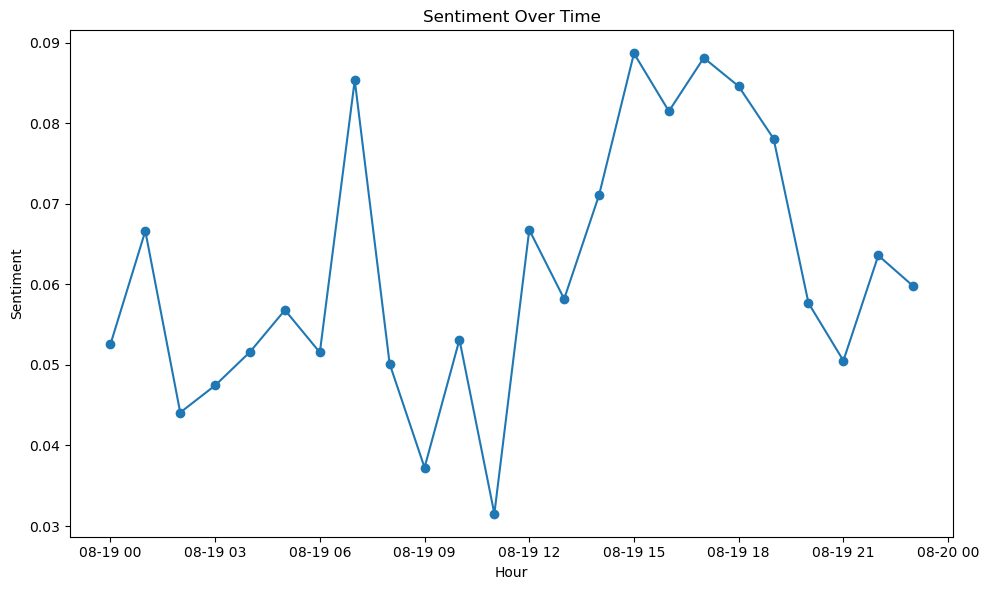

In [65]:
# Visualizing sentiment over time to see how sentiment is changing over time. Hopefully I will identify 
# trends and understand how sentiment is evolving. To achieve that I need to convert the 'tweetcreatedts' 
# column to datetime format since it is now an object type. Then,I will group by the date to calculate 
# the mean sentiment, and finally, plot this over time.

# Converting 'tweetcreatedts' to datetime
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

# Grouping by date and calculating mean sentiment
df_grouped = df.resample('H', on='tweetcreatedts')['sentiment'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.plot_date(df_grouped['tweetcreatedts'], df_grouped['sentiment'], linestyle='solid')
plt.title('Sentiment Over Time')
plt.xlabel('Hour')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()


In [66]:
# I grouped the data by hour. The plot shows how the mean sentiment changes over time in the dataset. It looks 
# like the sentiment mean for the day was positive flactuating between 0.03 and 0.09. The sentiment mean was the 
# closest to the neutral state around 11AM and most positive around 3PM.
# If we divided data by the time zones we might be able to observe patterns around people daily activities, 
# for example the sentiment could be at its highest when people are about to live work since they might be excited 
# about their afternoon plans...